In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Mumbai Indians', 'Kolkata Knight Riders'])) & (matches['team2'].isin(['Mumbai Indians', 'Kolkata Knight Riders']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Mumbai Indians', 'Kolkata Knight Riders'])) & (data['team2'].isin(['Mumbai Indians', 'Kolkata Knight Riders']))]

In [6]:
all_matches.shape

(25, 18)

### Who will win the match??

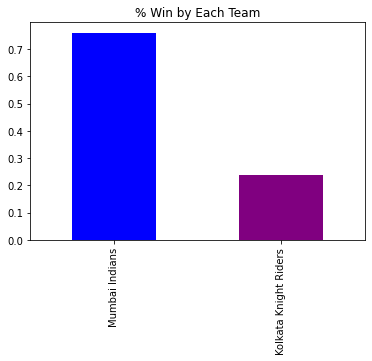

In [29]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win by Each Team', color = ['blue', 'purple'])

In [30]:
all_matches.groupby(['season', 'id'])['winner'].value_counts()

season  id     winner               
2008    75     Mumbai Indians           1
        99     Mumbai Indians           1
2009    132    Mumbai Indians           1
        138    Mumbai Indians           1
2010    191    Mumbai Indians           1
        230    Kolkata Knight Riders    1
2011    303    Mumbai Indians           1
        305    Mumbai Indians           1
2012    363    Mumbai Indians           1
        370    Kolkata Knight Riders    1
2013    413    Mumbai Indians           1
        434    Mumbai Indians           1
2014    458    Kolkata Knight Riders    1
        497    Kolkata Knight Riders    1
2015    518    Kolkata Knight Riders    1
        567    Mumbai Indians           1
2016    581    Mumbai Indians           1
        600    Mumbai Indians           1
2017    7      Mumbai Indians           1
        53     Mumbai Indians           1
        58     Mumbai Indians           1
2018    7930   Mumbai Indians           1
        7934   Mumbai Indians          

In [31]:
all_matches[all_matches['id'] == 11338]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar


In [32]:
all_matches.groupby('city')['winner'].value_counts()

city            winner               
Abu Dhabi       Kolkata Knight Riders    1
Bangalore       Mumbai Indians           1
Cuttack         Kolkata Knight Riders    1
East London     Mumbai Indians           1
Kolkata         Mumbai Indians           7
                Kolkata Knight Riders    3
Mumbai          Mumbai Indians           9
                Kolkata Knight Riders    1
Port Elizabeth  Mumbai Indians           1
Name: winner, dtype: int64

In [33]:
all_matches[all_matches['city'] == 'Abu Dhabi']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,2014,Abu Dhabi,4/16/2014,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN


In [34]:
sub_data1 = sub_data[sub_data['id'] == 458]

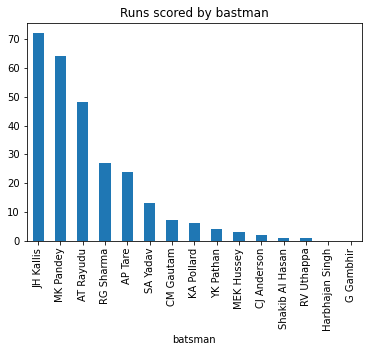

In [35]:
sub_data1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).plot.bar(title='Runs scored by bastman')

In [36]:
sub_data1.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False)

bowler           player_dismissed
Z Khan           RV Uthappa          1
Shakib Al Hasan  AP Tare             1
SP Narine        MEK Hussey          1
                 Harbhajan Singh     1
                 CJ Anderson         1
                 AT Rayudu           1
SL Malinga       Shakib Al Hasan     1
                 MK Pandey           1
                 JH Kallis           1
                 G Gambhir           1
PP Chawla        CM Gautam           1
M Morkel         RG Sharma           1
Name: player_dismissed, dtype: int64

In [37]:
all_matches.groupby(['season','winner'])['win_by_wickets','win_by_runs'].max()

win_by_wickets  win_by_runs
season winner                                            
2008   Mumbai Indians                      8            0
2009   Mumbai Indians                      0           92
2010   Kolkata Knight Riders               9            0
       Mumbai Indians                      7            0
2011   Mumbai Indians                      5            0
2012   Kolkata Knight Riders               0           32
       Mumbai Indians                      0           27
2013   Mumbai Indians                      5           65
2014   Kolkata Knight Riders               6           41
2015   Kolkata Knight Riders               7            0
       Mumbai Indians                      0            5
2016   Mumbai Indians                      6            0
2017   Mumbai Indians                      6            9
2018   Mumbai Indians                      0          102
2019   Kolkata Knight Riders               0           34
       Mumbai Indians                      9            0

In [38]:
all_matches['result'].unique()[0]

'normal'

In [39]:
all_matches.groupby('winner')['player_of_match'].value_counts()

winner                 player_of_match
Kolkata Knight Riders  AD Russell         1
                       JH Kallis          1
                       M Kartik           1
                       M Morkel           1
                       RV Uthappa         1
                       SP Narine          1
Mumbai Indians         HH Pandya          3
                       RG Sharma          3
                       SR Tendulkar       3
                       AT Rayudu          1
                       DR Smith           1
                       Ishan Kishan       1
                       JEC Franklin       1
                       JP Duminy          1
                       KV Sharma          1
                       MM Patel           1
                       N Rana             1
                       SM Pollock         1
                       ST Jayasuriya      1
Name: player_of_match, dtype: int64

In [40]:
sub_data[sub_data['bowler'] == 'JJ Bumrah']['player_dismissed'].value_counts()

RV Uthappa    2
R Singh       2
CA Lynn       2
C Munro       1
G Gambhir     1
AD Russell    1
SA Yadav      1
Name: player_dismissed, dtype: int64

In [44]:
data[(data['bowler'] == 'TA Boult') & (data['batting_team'] == 'Kolkata Knight Riders')]['player_dismissed'].value_counts()

SP Narine     2
RV Uthappa    1
AD Russell    1
Name: player_dismissed, dtype: int64

In [48]:
data[(data['bowler'] == 'TA Boult') & (data['batting_team'] == 'Kolkata Knight Riders') & (data['batsman'].isin(['SP Narine', 'AD Russell']))].groupby('batsman')['ball'].agg({'count'})

,count
batsman,
AD Russell,5
SP Narine,8


Balls faced by AD Russell and SP Narine is very less which means they are not able to survive most of the time in the pitch when TA Boult is bowling.

In [49]:
data[(data['bowler'] == 'JJ Bumrah') & (data['batting_team'] == 'Kolkata Knight Riders') & (data['batsman'].isin(['SP Narine', 'AD Russell']))].groupby('batsman')['ball'].agg({'count'})

,count
batsman,
AD Russell,28
SP Narine,1


Balls faced by russell against bumrah is pretty high and narine is not able to survive.

### How many wickets will MI loose in overs 6-15??

In [73]:
sub_data2 = sub_data[(sub_data['over'] >= 6) & (sub_data['over'] <= 15) & (-sub_data['player_dismissed'].isnull()) & (sub_data['batting_team'] == 'Mumbai Indians')]

In [74]:
sub_data2.shape

(54, 39)

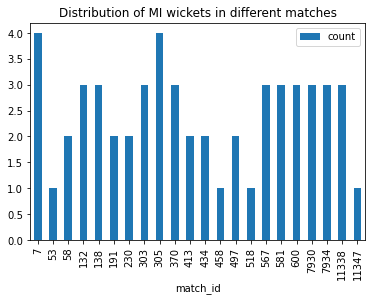

In [75]:
sub_data2.groupby('match_id')['player_dismissed'].agg({"count"}).plot.bar(title='Distribution of MI wickets in different matches')

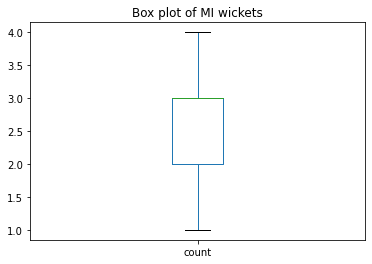

In [76]:
sub_data2.groupby('match_id')['player_dismissed'].agg({"count"}).plot.box(title='Box plot of MI wickets')

In [77]:
print('Average wickets lost by MI in overs 6-15 is : {}'.format(3))

Average wickets lost by MI in overs 6-15 is : 3


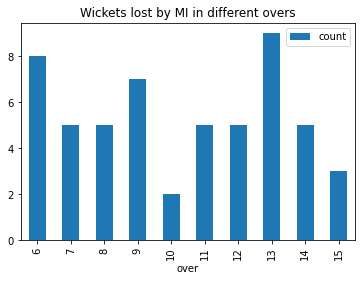

In [78]:
sub_data2.groupby('over')['player_dismissed'].agg({'count'}).plot.bar(title='Wickets lost by MI in different overs')

In [79]:
sub_data2[(sub_data2['over'].isin([6,9,13]))]['player_dismissed'].value_counts()

RG Sharma          3
SR Tendulkar       3
AT Rayudu          3
LMP Simmons        2
Harbhajan Singh    2
JC Buttler         2
AS Yadav           2
KH Pandya          2
HH Gibbs           1
E Lewis            1
PA Patel           1
JP Duminy          1
KD Karthik         1
Name: player_dismissed, dtype: int64

In [82]:
sub_data2[(sub_data2['player_dismissed'].isin(['RG Sharma', 'KH Pandya']))].groupby('player_dismissed')['bowler'].value_counts()

player_dismissed  bowler         
KH Pandya         AS Rajpoot         1
                  SP Narine          1
RG Sharma         SP Narine          3
                  AS Rajpoot         1
                  JH Kallis          1
                  NM Coulter-Nile    1
                  R Bhatia           1
Name: bowler, dtype: int64

In [84]:
sub_data[(sub_data['player_dismissed'] == 'RG Sharma')]['bowler'].unique()

array(['SP Narine', 'AS Rajpoot', 'NM Coulter-Nile', 'R Bhatia',
       'JH Kallis', 'R McLaren', 'M Morkel', 'P Krishna', 'H Gurney'],
      dtype=object)

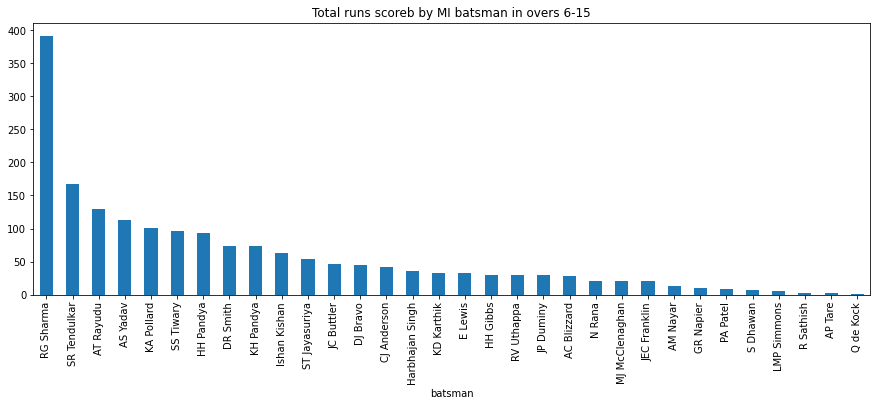

In [93]:
sub_data[(sub_data['batting_team'] == 'Mumbai Indians') & (sub_data['over'] >= 6) & (sub_data['over'] <= 15)].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).plot.bar(title='Total runs scoreb by MI batsman in overs 6-15', figsize=(15,5))

In [98]:
sub_data[(sub_data['batting_team'] == 'Mumbai Indians') & (sub_data['over'] >= 6) & (sub_data['over'] <= 15)].groupby(['bowler', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(15)

bowler           batsman     
SP Narine        RG Sharma       62
PP Chawla        RG Sharma       62
Iqbal Abdulla    DR Smith        37
AD Russell       RG Sharma       37
PP Chawla        HH Pandya       37
R Bhatia         RG Sharma       34
JH Kallis        RG Sharma       32
Shakib Al Hasan  RG Sharma       32
Kuldeep Yadav    Ishan Kishan    31
JH Kallis        SR Tendulkar    29
UT Yadav         RG Sharma       26
Kuldeep Yadav    RG Sharma       24
JH Kallis        AT Rayudu       24
PP Chawla        CJ Anderson     23
SP Narine        HH Pandya       22
Name: batsman_runs, dtype: int64

### How many 4s will be hit by KKR in the match??

In [102]:
sub_data3 = sub_data[(sub_data['batsman_runs'] == 4) & (sub_data['batting_team'] == 'Kolkata Knight Riders')]

In [104]:
sub_data3.groupby('match_id')['batsman_runs'].value_counts()

match_id  batsman_runs
7         4               14
53        4               14
58        4                8
75        4               15
99        4                7
132       4                8
138       4               10
191       4               15
230       4               13
303       4               16
305       4               15
363       4               14
370       4               12
413       4               16
434       4                8
458       4               14
497       4               14
518       4               11
567       4               19
581       4               11
600       4               17
7930      4               23
7934      4               12
11338     4               21
11347     4                2
Name: batsman_runs, dtype: int64

In [114]:
print('Average boundaries hit by KKR batsman is : {}'.format(round(sub_data3.groupby('match_id')['batsman_runs'].value_counts().mean())))

Average boundaries hit by KKR batsman is : 13


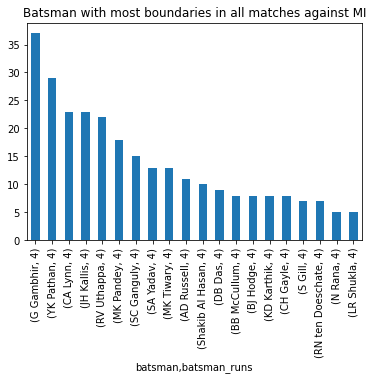

In [110]:
sub_data3.groupby(['batsman'])['batsman_runs'].value_counts().sort_values(ascending=False).head(20).plot.bar(title='Batsman with most boundaries in all matches against MI')

In [117]:
sub_data3.groupby('bowler')['batsman_runs'].value_counts().sort_values(ascending=False).head(10)

bowler           batsman_runs
SL Malinga       4               38
Harbhajan Singh  4               35
JJ Bumrah        4               28
MJ McClenaghan   4               22
KA Pollard       4               16
TG Southee       4               13
KH Pandya        4               13
HH Pandya        4               10
MG Johnson       4               10
DJ Bravo         4               10
Name: batsman_runs, dtype: int64

In [122]:
sub_data3[(sub_data3['bowler'].isin(['JJ Bumrah', 'KA Pollard', 'KH Pandya', 'KK Pandya']))].groupby(['over', 'bowler'])['batsman_runs'].value_counts().sort_values(ascending=False)

over  bowler      batsman_runs
11    KA Pollard  4               7
17    JJ Bumrah   4               6
2     JJ Bumrah   4               4
16    KA Pollard  4               3
19    JJ Bumrah   4               3
13    KH Pandya   4               3
10    KA Pollard  4               2
12    KH Pandya   4               2
3     JJ Bumrah   4               2
4     JJ Bumrah   4               2
      KH Pandya   4               2
11    JJ Bumrah   4               2
20    KH Pandya   4               2
14    JJ Bumrah   4               2
13    JJ Bumrah   4               1
20    KA Pollard  4               1
15    JJ Bumrah   4               1
9     KH Pandya   4               1
      KA Pollard  4               1
8     KH Pandya   4               1
      KA Pollard  4               1
7     KH Pandya   4               1
6     JJ Bumrah   4               1
5     KH Pandya   4               1
      JJ Bumrah   4               1
16    JJ Bumrah   4               1
20    JJ Bumrah   4              

In [127]:
sub_data3[sub_data3['over'].isin([1,2,3,4,5,6,15,16,17,18,19,20])].groupby('batsman')['batsman_runs'].value_counts().sort_values(ascending=False).head(10)

batsman     batsman_runs
G Gambhir   4               26
YK Pathan   4               20
CA Lynn     4               19
JH Kallis   4               17
SC Ganguly  4               11
RV Uthappa  4               11
AD Russell  4               10
MK Pandey   4                9
SA Yadav    4                9
CH Gayle    4                7
Name: batsman_runs, dtype: int64

### How many runs will be scored in the match??

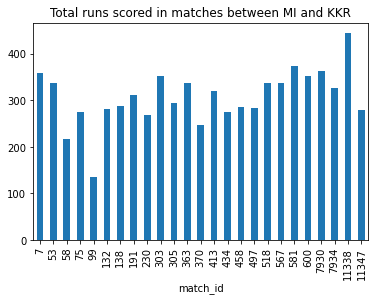

In [129]:
sub_data.groupby('match_id')['total_runs'].sum().plot.bar(title='Total runs scored in matches between MI and KKR')

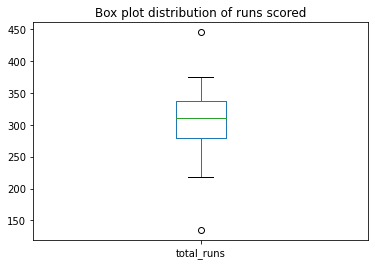

In [131]:
sub_data.groupby('match_id')['total_runs'].sum().plot.box(title='Box plot distribution of runs scored')

In [135]:
sub_data[(sub_data['batting_team'] == 'Mumbai Indians')].groupby(['match_id', 'batting'])

match_id  team1                  team2                
7         Kolkata Knight Riders  Mumbai Indians           358
53        Mumbai Indians         Kolkata Knight Riders    337
58        Kolkata Knight Riders  Mumbai Indians           218
75        Kolkata Knight Riders  Mumbai Indians           275
99        Kolkata Knight Riders  Mumbai Indians           135
132       Mumbai Indians         Kolkata Knight Riders    282
138       Mumbai Indians         Kolkata Knight Riders    287
191       Kolkata Knight Riders  Mumbai Indians           311
230       Mumbai Indians         Kolkata Knight Riders    268
303       Kolkata Knight Riders  Mumbai Indians           353
305       Kolkata Knight Riders  Mumbai Indians           295
363       Mumbai Indians         Kolkata Knight Riders    337
370       Kolkata Knight Riders  Mumbai Indians           248
413       Kolkata Knight Riders  Mumbai Indians           321
434       Mumbai Indians         Kolkata Knight Riders    275
458       Kolka

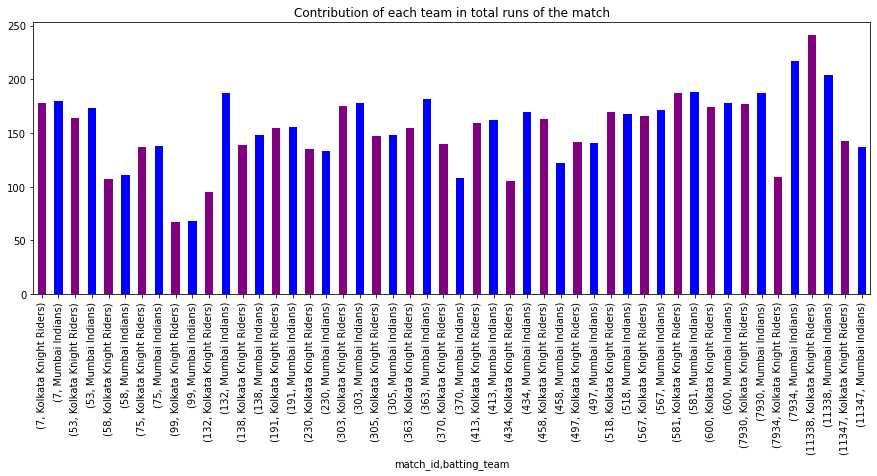

In [140]:
sub_data.groupby(['match_id', 'batting_team'])['total_runs'].sum().plot.bar(figsize=(15,5), color=['purple', 'blue'], title='Contribution of each team in total runs of the match')

In [144]:
sub_data.groupby('batting_team')['total_runs'].sum()

batting_team
Kolkata Knight Riders    3730
Mumbai Indians           3955
Name: total_runs, dtype: int64

In [147]:
sub_data.groupby('batting_team')['total_runs'].sum()[1]/len(sub_data)

0.6699983059461291

In [151]:
print('Contribution of KKR in total score of the match is : {}'.format(sub_data.groupby('batting_team')['total_runs'].sum()[0]/len(sub_data)))
print('Contribution of MI in total score of the match is : {}'.format(sub_data.groupby('batting_team')['total_runs'].sum()[1]/len(sub_data)))

Contribution of KKR in total score of the match is : 0.6318820938505845
Contribution of MI in total score of the match is : 0.6699983059461291


In [168]:
sub_data.groupby(['match_id', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).groupby(['match_id']).head(1)

match_id  batsman         
363       RG Sharma           109
518       RG Sharma            98
11338     HH Pandya            96
581       RG Sharma            84
7         MK Pandey            81
497       RV Uthappa           80
191       CH Gayle             75
138       BJ Hodge             73
458       JH Kallis            72
305       RN ten Doeschate     70
132       SR Tendulkar         68
600       RG Sharma            68
75        DJ Bravo             64
7934      Ishan Kishan         63
53        AT Rayudu            63
413       DR Smith             62
567       HH Pandya            61
7930      AS Yadav             60
303       JH Kallis            59
230       BB McCullum          57
11347     RG Sharma            56
434       SR Tendulkar         48
99        ST Jayasuriya        48
58        KH Pandya            45
370       MK Tiwary            41
Name: batsman_runs, dtype: int64

#### Players like Rohit Sharma, HH Pandya, Ishan Kishan are among those players who score big when MI plays against KKR.

### How will Rohit Sharma get out in the match??

In [170]:
sub_data4 = sub_data[sub_data['player_dismissed'] == 'RG Sharma']

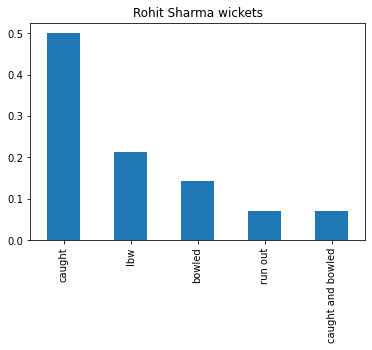

In [172]:
sub_data4['dismissal_kind'].value_counts(normalize=True).plot.bar(title='Rohit Sharma wickets')

In [177]:
sub_data4[sub_data4['dismissal_kind'].isin(['caught', 'lbw', 'bowled'])].groupby('bowler')['dismissal_kind'].value_counts().sort_values(ascending=False)

bowler           dismissal_kind
SP Narine        caught            2
                 bowled            2
                 lbw               1
R McLaren        caught            1
R Bhatia         caught            1
P Krishna        caught            1
NM Coulter-Nile  caught            1
M Morkel         caught            1
H Gurney         lbw               1
AS Rajpoot       lbw               1
Name: dismissal_kind, dtype: int64

In [178]:
sub_data4[sub_data4['dismissal_kind'].isin(['caught', 'lbw', 'bowled'])].groupby(['toss_decision'])['dismissal_kind'].value_counts()

toss_decision  dismissal_kind
bat            caught            2
field          caught            5
               lbw               3
               bowled            2
Name: dismissal_kind, dtype: int64

#### There is higher of Rohit Sharma getting out by caught, bowled and lbw. There is higher probability of Rohit Sharma getting out when batting second.